   Dementia?  Sex  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0          0    0   87    14  2.0  27.0  0.0  1987  0.696  0.883
1          0    0   88    14  2.0  30.0  0.0  2004  0.681  0.876
2          1    0   75    12  NaN  23.0  0.5  1678  0.736  1.046
3          1    0   76    12  NaN  28.0  0.5  1738  0.713  1.010
4          1    0   80    12  NaN  22.0  0.5  1698  0.701  1.034
(373, 10)
        Dementia?         Sex         Age        EDUC         SES        MMSE  \
count  373.000000  373.000000  373.000000  373.000000  354.000000  371.000000   
mean     0.589812    0.571046   77.013405   14.597855    2.460452   27.342318   
std      0.664461    0.495592    7.640957    2.876339    1.134005    3.683244   
min      0.000000    0.000000   60.000000    6.000000    1.000000    4.000000   
25%      0.000000    0.000000   71.000000   12.000000    2.000000   27.000000   
50%      0.000000    1.000000   77.000000   15.000000    2.000000   29.000000   
75%      1.000000    1.000000   8

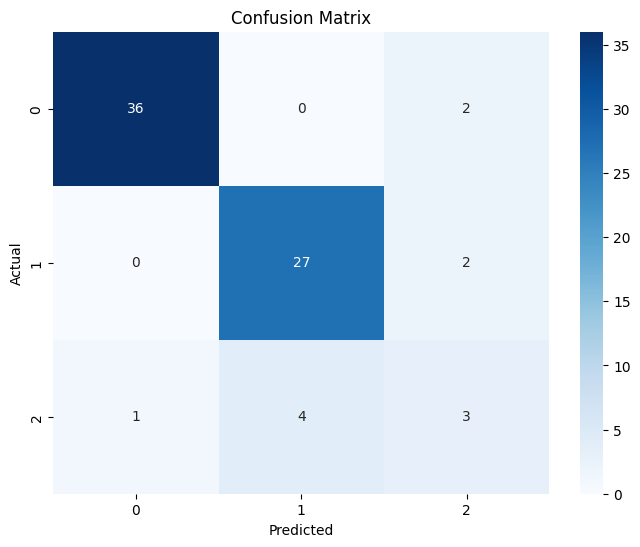

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix



#Reading the whole dataset using pandas 
data = pd.read_csv('dementia_dataset.csv')

#Renaming the names of the dataset into numbers 
data.rename(columns={'M/F': 'Sex'}, inplace=True)
data.rename(columns={'Group': 'Dementia?'}, inplace=True)

data =  data.replace('Nondemented', 0).replace('Demented', 1).replace('Converted',2)
data = data.replace('M', 0).replace('F', 1)

# Dropping unncecessary colums that wont be used from the dataset 
data.drop(columns=['Subject ID', 'MRI ID', 'Hand', 'Visit', 'MR Delay'], inplace=True)

# Explore the dataset    
print(data.head())  # View the first few rows 
print(data.shape)  # Check the dimensions 
print(data.describe())  # Summary statistics of numerical columns 

# We have seen there are 2 missing values 19 in SES and 2 in MMSE 
 
print(data.isnull().sum()) # Checking the missing values in df 
print(data.info()) # Overview of columns and data types 

# We going to have to split the data in order to analyze it 
X, y = data.drop('Dementia?', axis=1).values, data['Dementia?'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Random Forest classification
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
#print("Confusion Matrix:")
# print(cm)
print(data.info())

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

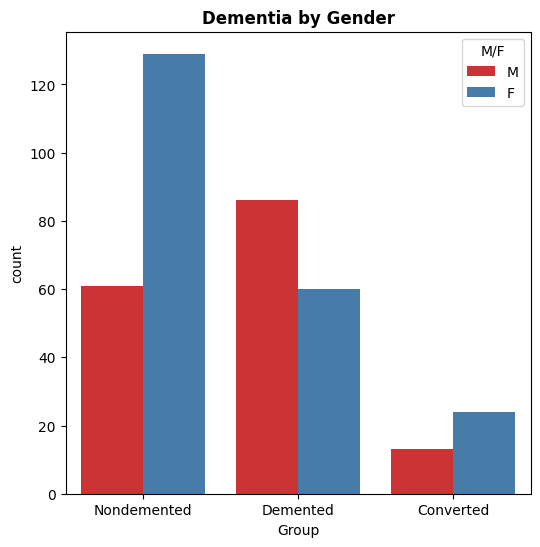

In [31]:
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import seaborn as sns 

pyplot.figure ( figsize= (6,6) )
sns.countplot ( x = "Group", hue="M/F", data = data, palette="Set1" )
plt.title("Dementia by Gender", size=12, weight='bold')
pyplot.show()

In [3]:
data = pd.read_csv('dementia_dataset.csv')
print(data.isnull().sum()) 

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [14]:
print(data.columns)


Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


In [6]:
import pandas as pd 
data = pd.read_csv('dementia_dataset.csv')
data["Group"].value_counts() 


Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv('dementia_dataset.csv')

# Separate features and target variable
X = data.drop('Group', axis=1)
y = data['Group']

# Apply hybrid sampling
sampler = SMOTE(sampling_strategy='auto')  # Oversampling minority class
undersampler = RandomUnderSampler(sampling_strategy='majority')  # Undersampling majority class

# Apply sampling techniques
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Create a new balanced DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Check the balanced class distribution
balanced_data['Group'].value_counts()

ValueError: could not convert string to float: 'OAS2_0001'

In [2]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.7 MB/s eta 0:00:0000:01


In [4]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv('dementia_dataset.csv')

# Perform hybrid sampling on the 'Group' column
sampler = SMOTE(sampling_strategy='auto')  # Oversampling minority class
undersampler = RandomUnderSampler(sampling_strategy='majority')  # Undersampling majority class

# Reshape the 'Group' column for sampling
y = data['Group'].values.reshape(-1, 1)

# Apply sampling techniques
y_resampled = sampler.fit_resample(y)
y_resampled = undersampler.fit_resample(y_resampled[0])

# Update the 'Group' column in the DataFrame with the resampled values
data['Group'] = y_resampled[0]

# Check the balanced class distribution
data['Group'].value_counts()


TypeError: BaseSampler.fit_resample() missing 1 required positional argument: 'y'

In [5]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv('dementia_dataset.csv')

# Separate features and target variable
X = data.drop('Group', axis=1)
y = data['Group']

# Perform hybrid sampling on the 'Group' column
sampler = SMOTE(sampling_strategy='auto')  # Oversampling minority class
undersampler = RandomUnderSampler(sampling_strategy='majority')  # Undersampling majority class

# Apply sampling techniques
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Update the 'Group' column in the DataFrame with the resampled values
data['Group'] = y_resampled

# Check the balanced class distribution
data['Group'].value_counts()


ValueError: could not convert string to float: 'OAS2_0001'

In [6]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv('dementia_dataset.csv')

# Separate the 'Group' column as the target variable
y = data['Group']

# Perform hybrid sampling on the 'Group' column
sampler = SMOTE(sampling_strategy='auto')  # Oversampling minority class
undersampler = RandomUnderSampler(sampling_strategy='majority')  # Undersampling majority class

# Apply sampling techniques to the 'Group' column
y_resampled = y.to_frame()  # Convert 'Group' column to a DataFrame for resampling
y_resampled['Group'] = undersampler.fit_resample(sampler.fit_resample(y.to_frame())['Group'].values.reshape(-1, 1))[0]

# Update the 'Group' column in the DataFrame with the resampled values
data['Group'] = y_resampled['Group']

# Check the balanced class distribution of 'Group' column
data['Group'].value_counts()


TypeError: BaseSampler.fit_resample() missing 1 required positional argument: 'y'

In [7]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv('dementia_dataset.csv')

# Separate features and target variable
X = data.drop('Group', axis=1)
y = data['Group']

# Perform hybrid sampling on the 'Group' column
sampler = SMOTE(sampling_strategy='auto')  # Oversampling minority class
undersampler = RandomUnderSampler(sampling_strategy='majority')  # Undersampling majority class

# Reshape 'Group' column for sampling
y_resampled = sampler.fit_resample(y.values.reshape(-1, 1), y)
y_resampled = undersampler.fit_resample(y_resampled[0], y_resampled[1])

# Update the 'Group' column in the DataFrame with the resampled values
data.loc[y_resampled[1].index, 'Group'] = y_resampled[0]

# Check the balanced class distribution of 'Group' column
data['Group'].value_counts()


ValueError: could not convert string to float: 'Nondemented'

In [78]:
# Import the required algorithms
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

============================================================================================================================
### Edit the code from here, the code below is messy so u can sort it out. And u need to conduct the exploratory data analysis. So u need to figure out the relations between the variables and then plot the graphs accordingly


## Baseline Model

In [54]:
model = SVC()
model.fit(X_train, y_train);

In [55]:
model.score(X_test,y_test)

0.5066666666666667

In [18]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_score = knn_model.score(X_test, y_test)

# Plotting the score
plt.figure(figsize=(8, 6))
plt.bar(["KNN"], [knn_score])
plt.ylim(0, 1)  # Set the y-axis limit to 0-1
plt.title("Accuracy Score of KNN Model")
plt.ylabel("Accuracy")
plt.show()

NameError: name 'X_train' is not defined

In [57]:
knn_score = knn_model.score(X_test,y_test)
knn_score

0.49333333333333335

In [20]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [22]:
gnb.score(X_test,y_test)

0.9066666666666666

In [35]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_score = random_forest.score(X_test, y_test)

# Plotting the score
plt.figure(figsize=(8, 6))
plt.bar(["Random Forest"], [random_forest_score])
plt.ylim(0, 1)  # Set the y-axis limit to 0-1
plt.title("Accuracy Score of Random Forest Classifier")
plt.ylabel("Accuracy")
plt.show()

NameError: name 'X_train' is not defined

In [36]:
random_forest.score(X_test,y_test)

0.9066666666666666

## Tuning hyperparameters for KNN

In [58]:
train_scores = []
test_scores = []

neighbours = range(1,21)

# Loop through different n_neighbours
for i in neighbours:
    knn_model.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn_model.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn_model.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn_model.score(X_test, y_test))

In [59]:
train_scores

[1.0,
 0.825503355704698,
 0.825503355704698,
 0.7818791946308725,
 0.7483221476510067,
 0.7214765100671141,
 0.7248322147651006,
 0.6879194630872483,
 0.6812080536912751,
 0.6946308724832215,
 0.6610738255033557,
 0.62751677852349,
 0.6375838926174496,
 0.6442953020134228,
 0.6409395973154363,
 0.6140939597315436,
 0.6073825503355704,
 0.6241610738255033,
 0.6208053691275168,
 0.6174496644295302]

In [60]:
test_scores

[0.64,
 0.5466666666666666,
 0.5866666666666667,
 0.5866666666666667,
 0.56,
 0.5866666666666667,
 0.52,
 0.5866666666666667,
 0.6,
 0.56,
 0.56,
 0.56,
 0.5733333333333334,
 0.5733333333333334,
 0.52,
 0.52,
 0.52,
 0.52,
 0.5333333333333333,
 0.49333333333333335]

Maximum KNN scores on test data: 64.00


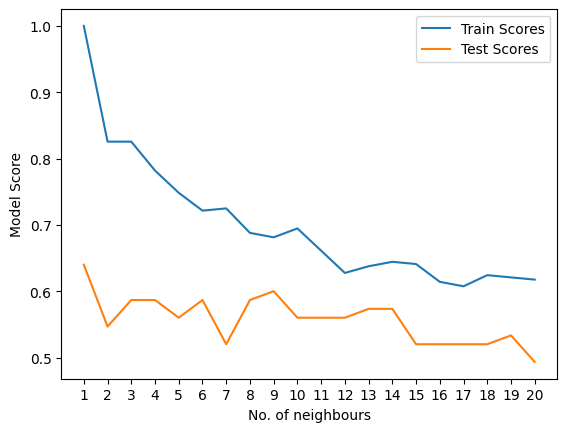

In [61]:
plt.plot(neighbours, train_scores, label="Train Scores")
plt.plot(neighbours, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21,1))
plt.xlabel("No. of neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN scores on test data: {max(test_scores)*100:.2f}")

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
knn_score = knn.score(X_test,y_test)

In [65]:
knn_score

0.64

## Tuning Hyperparameters For RandomForest

In [39]:
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

# Setup random seed
np.random.seed(42)

# Setup random hyperparamtere search for RandomForestClassifier
rs_rd = RandomizedSearchCV(RandomForestClassifier(),
                          rf_grid,
                          cv=3,
                          n_iter=10,
                          verbose=True)

# Fit random hyperparamtere search model for RandomForestClassifier
rs_rd.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_rd.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [41]:
rs_rd = RandomForestClassifier(n_estimators=510,
                              min_samples_leaf=19,
                              min_samples_split=18,
                              max_depth=5)

In [42]:
rs_rd.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=19, min_samples_split=18,
                       n_estimators=510)

In [53]:
rf_score = rs_rd.score(X_test,y_test)
rf_score

0.8933333333333333

## Tuning Hyperparameters For SVC

In [44]:
# Create a hyperparamter grid for RandForestCLassifier
svc_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.001, 0.0001],
              'kernel': ['rbf']}

# Setup random seed
np.random.seed(42)

# Setup random hyperparamtere search for RandomForestClassifier
svc_rf = RandomizedSearchCV(SVC(),
                          svc_grid,
                          cv=5,
                          n_iter=100,
                          verbose=True)

# Fit random hyperparamtere search model for RandomForestClassifier
svc_rf.fit(X_train, y_train)

C:\Users\Public\Desktop\cv\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=True)

In [45]:
svc_rf.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}

In [52]:
svc_score = svc_rf.score(X_test,y_test)
svc_score

0.6666666666666666

## GaussianNB  hyperparameter tuning

In [47]:
# Define the hyperparameter grid
param_grid = {
    'var_smoothing': np.logspace(-15, -5, 11)  # Range of values for var_smoothing
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(gnb, 
                                   param_distributions=param_grid, 
                                   n_iter=10, 
                                   cv=3,
                                  verbose=True)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X, y) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05])},
                   verbose=True)

In [50]:
gnb_score = random_search.score(X_test,y_test)
gnb_score

0.9066666666666666

## Plotting the results for the models result

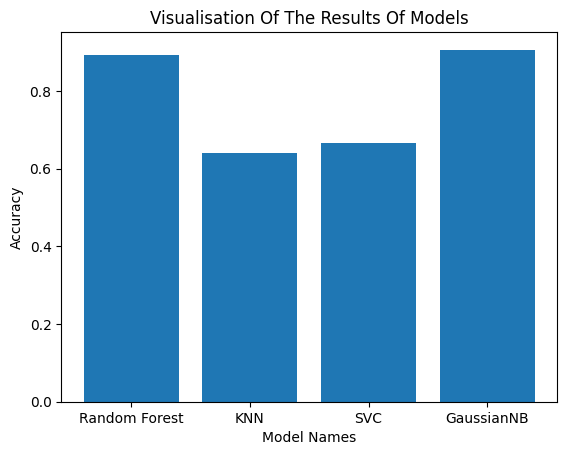

In [66]:
plt.bar(["Random Forest","KNN","SVC","GaussianNB"],
        [rf_score,knn_score,svc_score,gnb_score]);
plt.title("Visualisation Of The Results Of Models");
plt.ylabel("Accuracy");
plt.xlabel("Model Names");

## Ideal Machine Learning Model Is GaussianNB

In [67]:
# Make predictions with tuned model
y_preds = random_search.predict(X_test)

In [68]:
y_pred

array([0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 1], dtype=int64)

In [69]:
y_test

array([0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 2, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [70]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[37  1  0]
 [ 0 27  2]
 [ 2  2  4]]


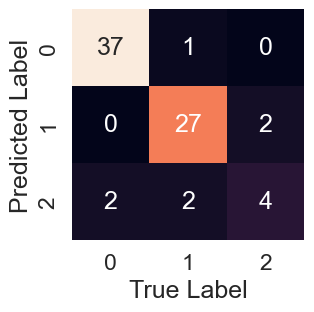

In [71]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False) # cbar: the vertical bar
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)

In [74]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.90      0.93      0.92        29
           2       0.67      0.50      0.57         8

    accuracy                           0.91        75
   macro avg       0.84      0.80      0.82        75
weighted avg       0.90      0.91      0.90        75



## Calculate evaluation metrics using cross-validation


In [75]:
random_search.best_params_

{'var_smoothing': 1e-07}

In [76]:
clf = GaussianNB(var_smoothing=1e-07)

In [79]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        scoring="accuracy",
                        cv=5)
cv_acc = np.mean(cv_acc)
cv_acc

0.8953153153153153